In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [5]:
train_info=pd.DataFrame()
train_info["Type"]=train.dtypes
train_info["Nulls"]=train.isnull().sum()
train_info["Uniques"]=train.nunique()

In [6]:
train_info

Type  Nulls  Uniques
PassengerId    int64      0      891
Survived       int64      0        2
Pclass         int64      0        3
Name          object      0      891
Sex           object      0        2
Age          float64    177       88
SibSp          int64      0        7
Parch          int64      0        7
Ticket        object      0      681
Fare         float64      0      248
Cabin         object    687      147
Embarked      object      2        3

## Explore

In [7]:
def freq(dff):
    freq=dff.value_counts()
    rell=dff.value_counts()/len(dff)
    rell=rell.round(2)
    x=pd.concat([freq,rell],axis=1)
    return x

In [8]:
freq(train['Survived'])

count  count
Survived              
0           549   0.62
1           342   0.38

In [9]:
freq(train["Sex"])

count  count
Sex                 
male      577   0.65
female    314   0.35

In [10]:
freq(train['Pclass'])

count  count
Pclass              
3         491   0.55
1         216   0.24
2         184   0.21

In [11]:
freq(train['Parch'])

count  count
Parch              
0        678   0.76
1        118   0.13
2         80   0.09
5          5   0.01
3          5   0.01
4          4   0.00
6          1   0.00

In [12]:
freq(train['SibSp'])

count  count
SibSp              
0        608   0.68
1        209   0.23
2         28   0.03
4         18   0.02
3         16   0.02
8          7   0.01
5          5   0.01

In [13]:
freq(train['Embarked'])

count  count
Embarked              
S           644   0.72
C           168   0.19
Q            77   0.09

In [14]:
train.describe().round(2)

PassengerId  Survived  Pclass     Age   SibSp   Parch    Fare
count       891.00    891.00  891.00  714.00  891.00  891.00  891.00
mean        446.00      0.38    2.31   29.70    0.52    0.38   32.20
std         257.35      0.49    0.84   14.53    1.10    0.81   49.69
min           1.00      0.00    1.00    0.42    0.00    0.00    0.00
25%         223.50      0.00    2.00   20.12    0.00    0.00    7.91
50%         446.00      0.00    3.00   28.00    0.00    0.00   14.45
75%         668.50      1.00    3.00   38.00    1.00    0.00   31.00
max         891.00      1.00    3.00   80.00    8.00    6.00  512.33

In [15]:
cols=[coll for coll in train.columns if train[coll].dtype in ['int64','float64']]
cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [16]:
train[cols].cov().round(2)

PassengerId  Survived  Pclass     Age  SibSp  Parch     Fare
PassengerId     66231.00     -0.63   -7.56  138.70 -16.33  -0.34   161.88
Survived           -0.63      0.24   -0.14   -0.55  -0.02   0.03     6.22
Pclass             -7.56     -0.14    0.70   -4.50   0.08   0.01   -22.83
Age               138.70     -0.55   -4.50  211.02  -4.16  -2.34    73.85
SibSp             -16.33     -0.02    0.08   -4.16   1.22   0.37     8.75
Parch              -0.34      0.03    0.01   -2.34   0.37   0.65     8.66
Fare              161.88      6.22  -22.83   73.85   8.75   8.66  2469.44

In [17]:
def bar(df,col):
    sns.countplot(data=df,x=col,hue="Survived")
    plt.plot()

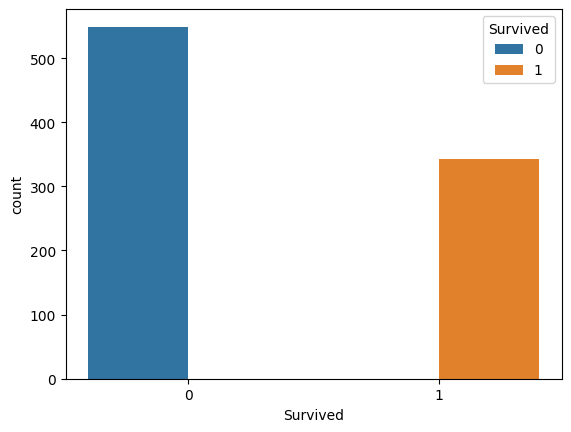

In [18]:
bar(train,"Survived")

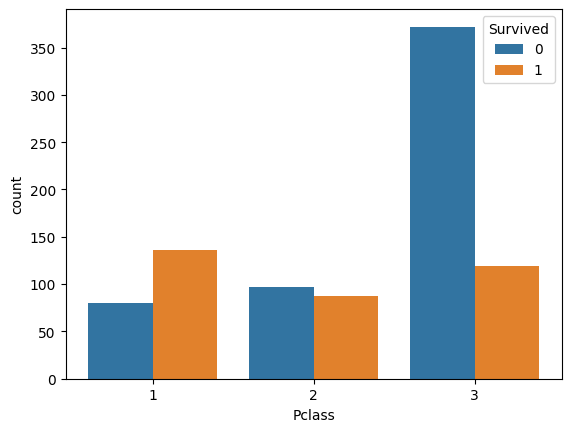

In [19]:
bar(train,"Pclass")

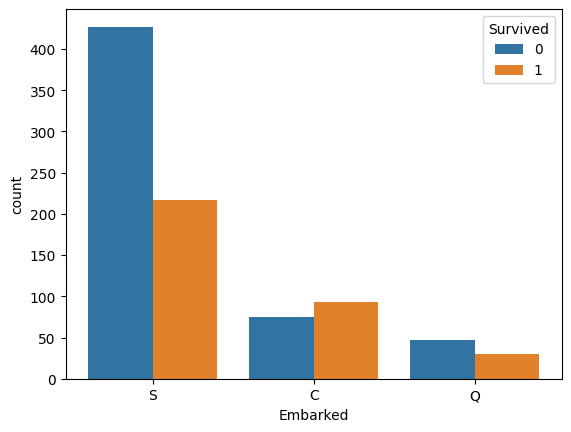

In [20]:
bar(train,"Embarked")

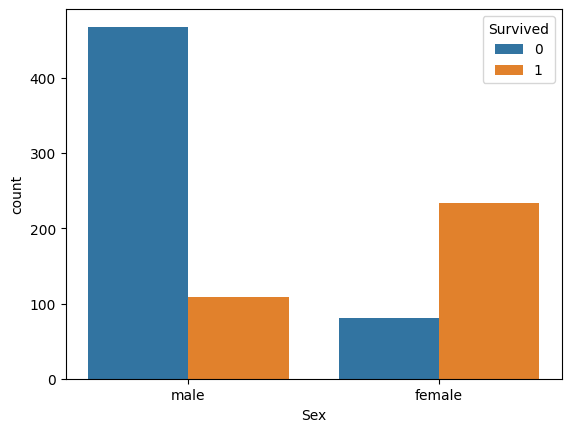

In [21]:
bar(train,"Sex")

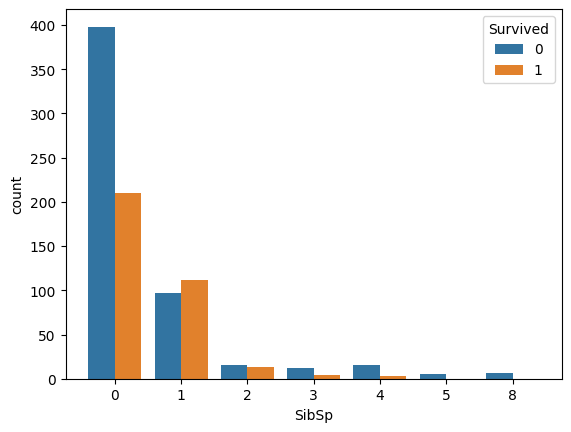

In [22]:
bar(train,"SibSp")

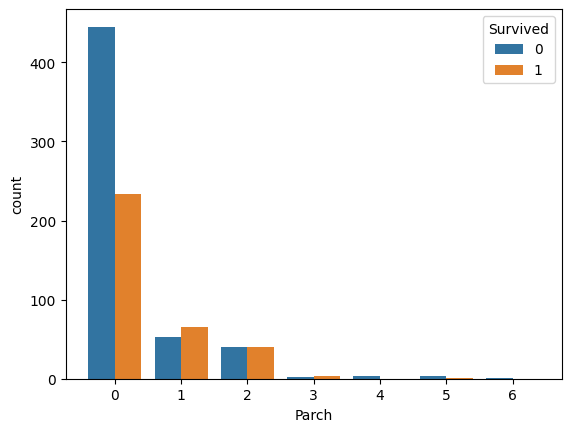

In [23]:
bar(train,"Parch")

In [24]:
def dist(df,col):
    sns.histplot(df[col],kde=True,bins=20)

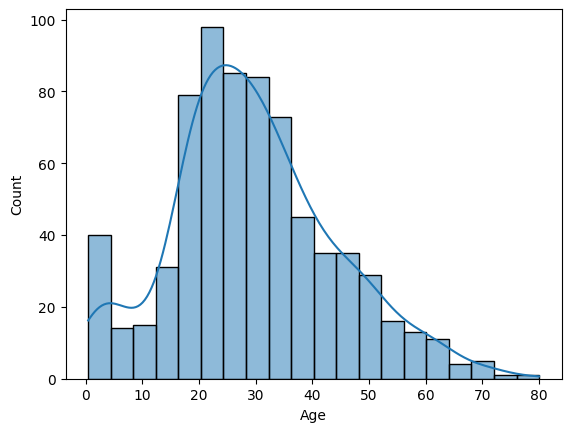

In [25]:
dist(train,"Age")

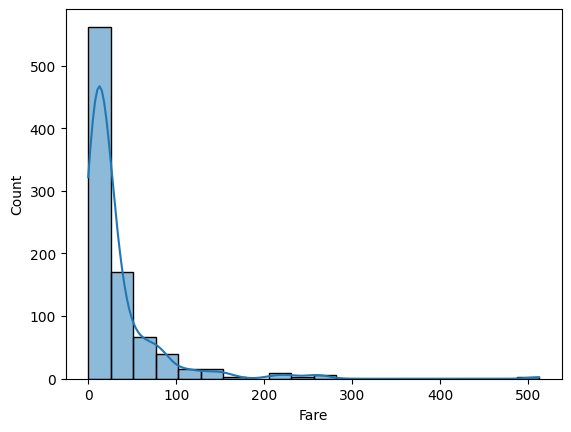

In [26]:
dist(train,"Fare")

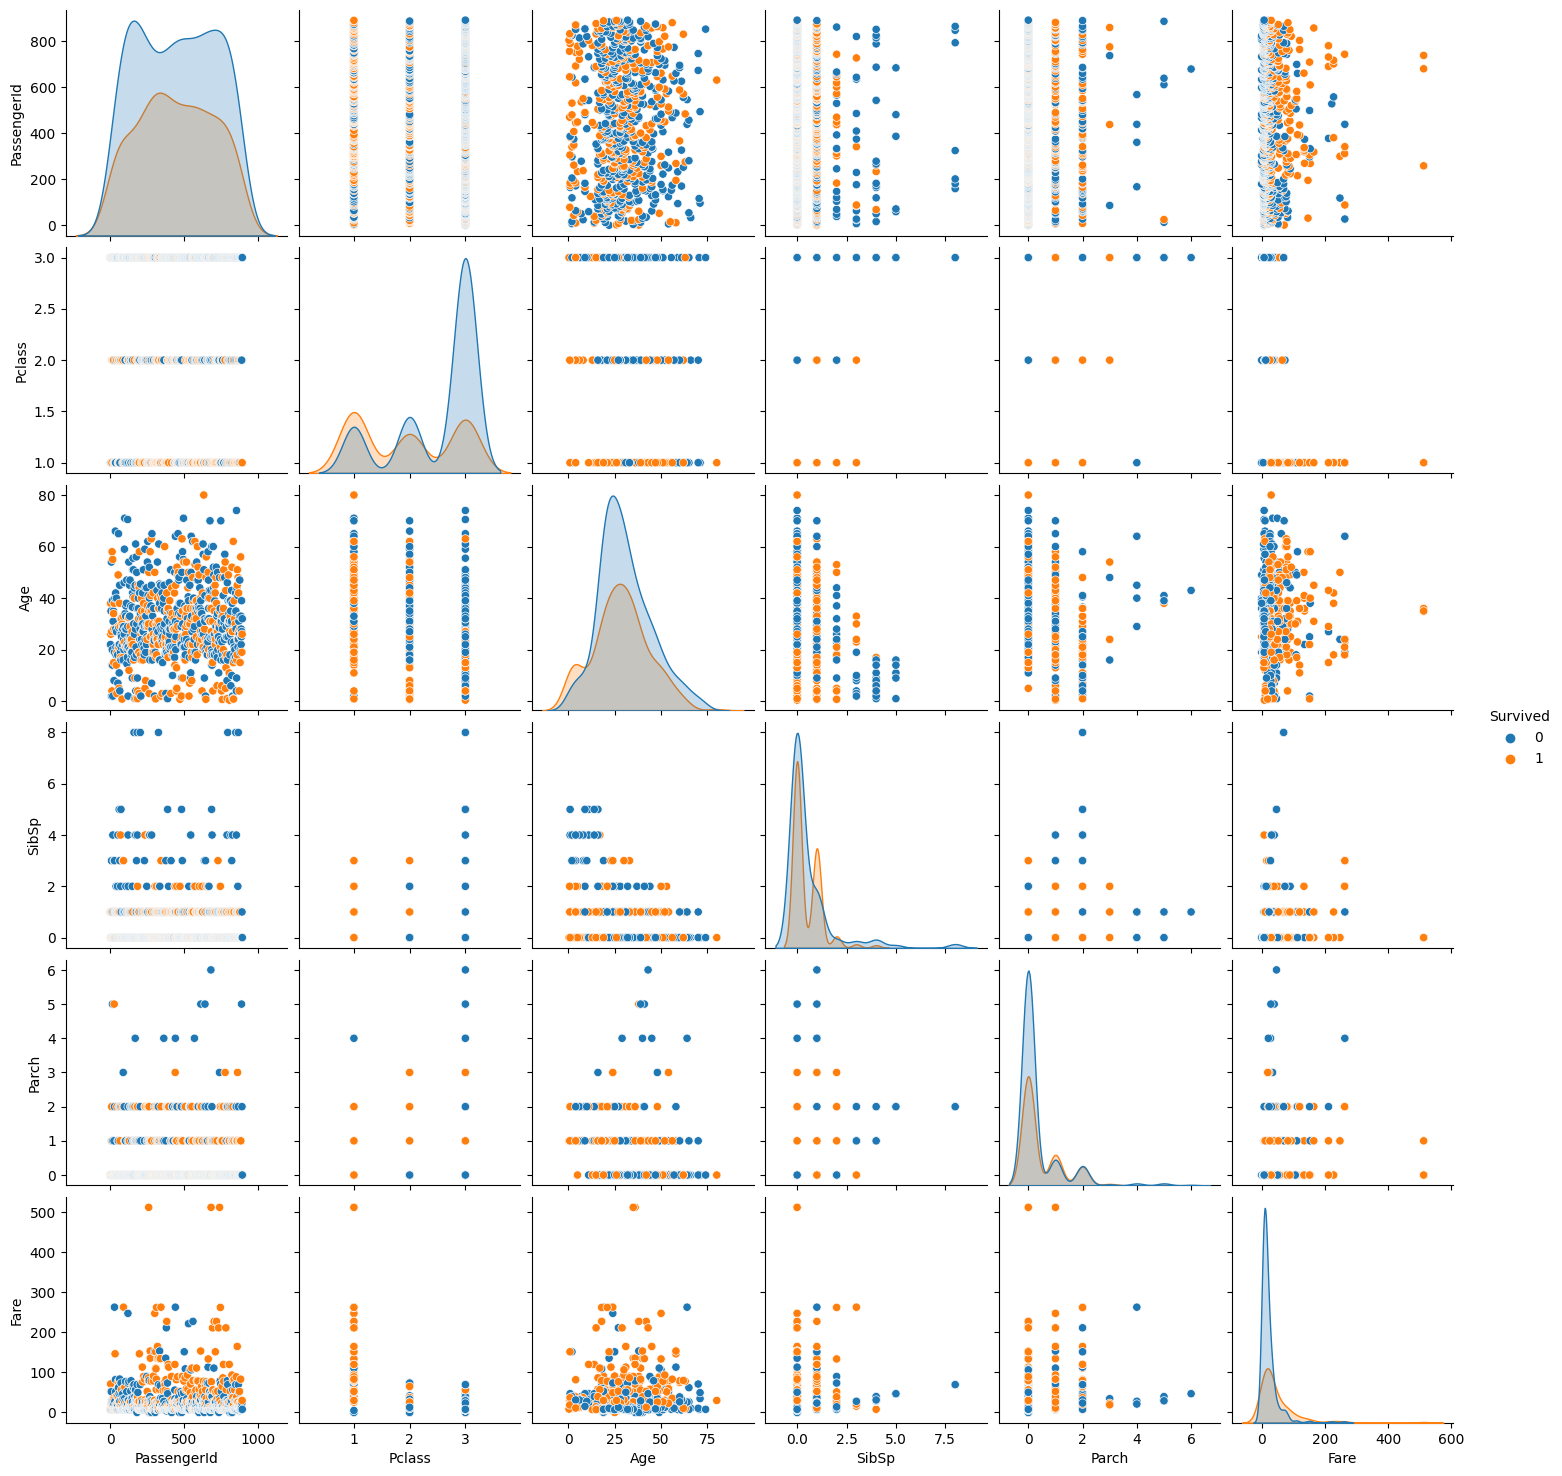

In [27]:
sns.pairplot(train,hue="Survived")

<Axes: >

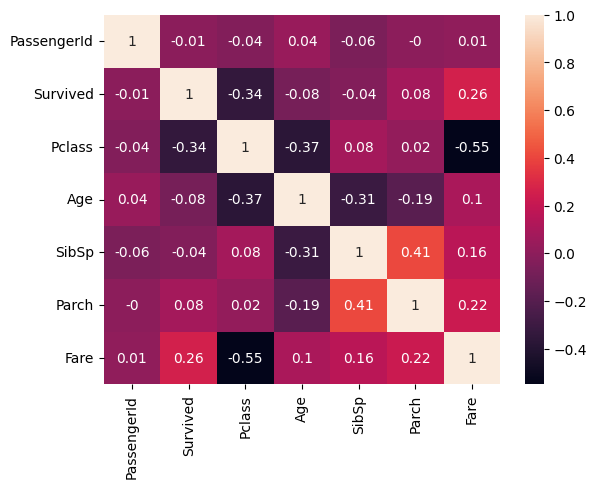

In [28]:
sns.heatmap(train[cols].corr().round(2),annot=True)

In [29]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [30]:
train=train.drop(['Cabin'],axis=1,inplace=False)

In [31]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [32]:
train['Age'].fillna(train['Age'].mean(),inplace=True)

In [33]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [34]:
train["Embarked"].fillna(train['Age'].mode()[0],inplace=True)

In [35]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [36]:
train.replace({'Sex':{'male':0,'female':1},'Embarked':{'C':1,"S":2,'Q':3}},inplace=True)

In [37]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500       2.0  
1          PC 17599  71.2833       1.0  
2  STON/O2. 3101282   7.9250       2.0  
3            113803  53.1000       2.0  
4            373450   8.0500       2.0

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_valid=train_test_split(train,test_size=0.2)

In [40]:
X_train.head()

PassengerId  Survived  Pclass                            Name  Sex   Age  \
447          448         1       1     Seward, Mr. Frederic Kimber    0  34.0   
259          260         1       2     Parrish, Mrs. (Lutie Davis)    1  50.0   
353          354         0       3       Arnold-Franchi, Mr. Josef    0  25.0   
4              5         0       3        Allen, Mr. William Henry    0  35.0   
310          311         1       1  Hays, Miss. Margaret Bechstein    1  24.0   

     SibSp  Parch  Ticket     Fare  Embarked  
447      0      0  113794  26.5500       2.0  
259      0      1  230433  26.0000       2.0  
353      1      0  349237  17.8000       2.0  
4        0      0  373450   8.0500       2.0  
310      0      0   11767  83.1583       1.0

In [41]:
X_valid.head()

PassengerId  Survived  Pclass  \
624          625         0       3   
514          515         0       3   
601          602         0       3   
52            53         1       1   
427          428         1       2   

                                                  Name  Sex        Age  SibSp  \
624                        Bowen, Mr. David John "Dai"    0  21.000000      0   
514                                  Coleff, Mr. Satio    0  24.000000      0   
601                               Slabenoff, Mr. Petco    0  29.699118      0   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)    1  49.000000      1   
427  Phillips, Miss. Kate Florence ("Mrs Kate Louis...    1  19.000000      0   

     Parch    Ticket     Fare  Embarked  
624      0     54636  16.1000       2.0  
514      0    349209   7.4958       2.0  
601      0    349214   7.8958       2.0  
52       0  PC 17572  76.7292       1.0  
427      0    250655  26.0000       2.0

In [42]:
X_train.shape

(712, 11)

In [43]:
X_valid.shape

(179, 11)

In [44]:
x_train=X_train.drop(columns = ['Survived','Name','Ticket'],axis =0)

In [45]:
y_train=X_train[['Survived']]

In [46]:
y_train.head()

Survived
447         1
259         1
353         0
4           0
310         1

In [47]:
x_train.head()

PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
447          448       1    0  34.0      0      0  26.5500       2.0
259          260       2    1  50.0      0      1  26.0000       2.0
353          354       3    0  25.0      1      0  17.8000       2.0
4              5       3    0  35.0      0      0   8.0500       2.0
310          311       1    1  24.0      0      0  83.1583       1.0

In [48]:
x_test=X_valid.drop(columns = ['Survived','Name','Ticket'],axis =0)
y_test=X_valid["Survived"]

In [49]:
# Now given test data
test=test.drop(['Cabin'],axis = 1,inplace = False)

In [50]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [51]:
test['Age'].fillna(test['Age'].mean(),inplace=True)

In [52]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [53]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [54]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [55]:
test=test.drop(['Name','Ticket'],axis=1)

In [56]:
test.head()

PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0          892       3    male  34.5      0      0   7.8292        Q
1          893       3  female  47.0      1      0   7.0000        S
2          894       2    male  62.0      0      0   9.6875        Q
3          895       3    male  27.0      0      0   8.6625        S
4          896       3  female  22.0      1      1  12.2875        S

In [57]:
test.replace({'Sex':{'male':0,'female':1},'Embarked':{'C':1,"S":2,'Q':3}},inplace=True)

In [58]:
test.head()

PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0          892       3    0  34.5      0      0   7.8292         3
1          893       3    1  47.0      1      0   7.0000         2
2          894       2    0  62.0      0      0   9.6875         3
3          895       3    0  27.0      0      0   8.6625         2
4          896       3    1  22.0      1      1  12.2875         2

## Model Building

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
# import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 

In [60]:
R_model=RandomForestClassifier(random_state=1)
D_model=DecisionTreeClassifier()

In [61]:
R_model.fit(x_train,y_train)
D_model.fit(x_train,y_train)

C:\Users\tarun\AppData\Local\Temp\ipykernel_25736\3139185947.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  R_model.fit(x_train,y_train)


DecisionTreeClassifier()

In [62]:
p1=R_model.predict(test)
p2=D_model.predict(test)

In [63]:
R_model.score(x_test,y_test)

0.8212290502793296

In [64]:
D_model.score(x_test,y_test)

0.7932960893854749

RandomForestModel is the best one

In [65]:
test['Survived']=p1

In [66]:
test.head()

PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0          892       3    0  34.5      0      0   7.8292         3         0
1          893       3    1  47.0      1      0   7.0000         2         0
2          894       2    0  62.0      0      0   9.6875         3         0
3          895       3    0  27.0      0      0   8.6625         2         0
4          896       3    1  22.0      1      1  12.2875         2         0

In [67]:
test.to_csv('submission.csv',index = False)